# Avocado Project

Project Description :   
This data was downloaded from the Hass Avocado Board website in May of 2018 & compiled into a single CSV.
  
The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. 

Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. 

The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.  
Some relevant columns in the dataset:  
•	Date - The date of the observation  
•	AveragePrice - the average price of a single avocado  
•	type - conventional or organic   
•	year - the year  
•	Region - the city or region of the observation  
•	Total Volume - Total number of avocados sold  
•	4046 - Total number of avocados with PLU 4046 sold  
•	4225 - Total number of avocados with PLU 4225 sold   
•	4770 - Total number of avocados with PLU 4770 sold   

Inspiration /Label 
The dataset can be seen in two angles to find the region and find the average price .  
Task: One of Classification and other of Regresssion.


#### Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

#### Loading the Dataset and showing first 5 rows

In [2]:
df = pd.read_csv("C:\\csv files\\avocado.csv")
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


## Exploratory Data Analysis(EDA)

In [3]:
#checking the dimension of the dataset
df.shape

(18249, 14)

This dataset contains 18249 rows and 14 columns

In [4]:
#getting the information from the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


Here we can see there are no null values present in the dataset.

In [5]:
# Checking Data type of Columns
df.dtypes

Unnamed: 0        int64
Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

Observation :  
We can see there are 3 different types of data (int,folat and object) present in the dataset.  
Date is of object type, will change it later.

In [6]:
# checking for the missing values
df.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

We can see there are no missing values present in the dataset.

In [7]:
#Checking unique values of each columns
df.nunique()

Unnamed: 0         53
Date              169
AveragePrice      259
Total Volume    18237
4046            17702
4225            18103
4770            12071
Total Bags      18097
Small Bags      17321
Large Bags      15082
XLarge Bags      5588
type                2
year                4
region             54
dtype: int64

From above we can see the number of unique values in each column.

In [8]:
# Checking the Unique Values of Each Column
df.apply(pd.Series.unique)

Unnamed: 0      [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...
Date            [2015-12-27, 2015-12-20, 2015-12-13, 2015-12-0...
AveragePrice    [1.33, 1.35, 0.93, 1.08, 1.28, 1.26, 0.99, 0.9...
Total Volume    [64236.62, 54876.98, 118220.22, 78992.15, 5103...
4046            [1036.74, 674.28, 794.7, 1132.0, 941.48, 1184....
4225            [54454.85, 44638.81, 109149.67, 71976.41, 4383...
4770            [48.16, 58.33, 130.5, 72.58, 75.78, 43.61, 93....
Total Bags      [8696.87, 9505.56, 8145.35, 5811.16, 6183.95, ...
Small Bags      [8603.62, 9408.07, 8042.21, 5677.4, 5986.26, 6...
Large Bags      [93.25, 97.49, 103.14, 133.76, 197.69, 127.44,...
XLarge Bags     [0.0, 33.33, 104.17, 13.53, 2.71, 24.41, 24.6,...
type                                      [conventional, organic]
year                                     [2015, 2016, 2017, 2018]
region          [Albany, Atlanta, BaltimoreWashington, Boise, ...
dtype: object

From above we can see the column "Unnamed:0" is just a representation of the indexes, so it's unnecessary to keep.

In [9]:
#Dropping out the unrequired column
df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [10]:
df.head(2)

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany


Now we can see the 'Unnamed: 0' column has been removed successfully from the dataset.

In [11]:
#duplicate check of all columns
df.duplicated().sum()

0

No duplicates present in the dataset.

In [12]:
# Extracting month from date column.
df.Date = df.Date.apply(pd.to_datetime)
df['Month'] = df['Date'].apply(lambda x:x.month)
df.drop('Date',axis=1,inplace=True)
df.Month = df.Month.map({1:'JAN',2:'FEB',3:'MARCH',4:'APRIL',5:'MAY',6:'JUNE',7:'JULY',8:'AUG',9:'SEPT',10:'OCT',11:'NOV',12:'DEC'})


In [13]:
#checking
df.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,DEC
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,DEC
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,DEC
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,DEC
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,NOV


#### Taking Average Price as our Target/Label. so Regression Problem.

## Statistical analysis of the dataset

In [14]:
#summary of the dataset of only numerical columns
df.describe().T.round(3)

,count,mean,std,min,25%,50%,75%,max
AveragePrice,18249.0,1.406,0.403,0.44,1.10,1.37,1.66,3.25
Total Volume,18249.0,850644.013,3453545.355,84.56,10838.58,107376.76,432962.29,62505646.52
4046,18249.0,293008.425,1264989.082,0.00,854.07,8645.30,111020.20,22743616.17
4225,18249.0,295154.568,1204120.401,0.00,3008.78,29061.02,150206.86,20470572.61
4770,18249.0,22839.736,107464.068,0.00,0.00,184.99,6243.42,2546439.11
Total Bags,18249.0,239639.202,986242.399,0.00,5088.64,39743.83,110783.37,19373134.37
Small Bags,18249.0,182194.687,746178.515,0.00,2849.42,26362.82,83337.67,13384586.80
Large Bags,18249.0,54338.088,243965.965,0.00,127.47,2647.71,22029.25,5719096.61
XLarge Bags,18249.0,3106.427,17692.895,0.00,0.00,0.00,132.50,551693.65
year,18249.0,2016.148,0.940,2015.00,2015.00,2016.00,2017.00,2018.00


From the above summary we can observe the followings.
- The counts of all the columns are same i.e,18249 which means there are no missing values present in it.
- It can be suspect that some of the features contain outliers after looking at 50% and max columns.
Will investigate regarding this further.

## Visual Analysis

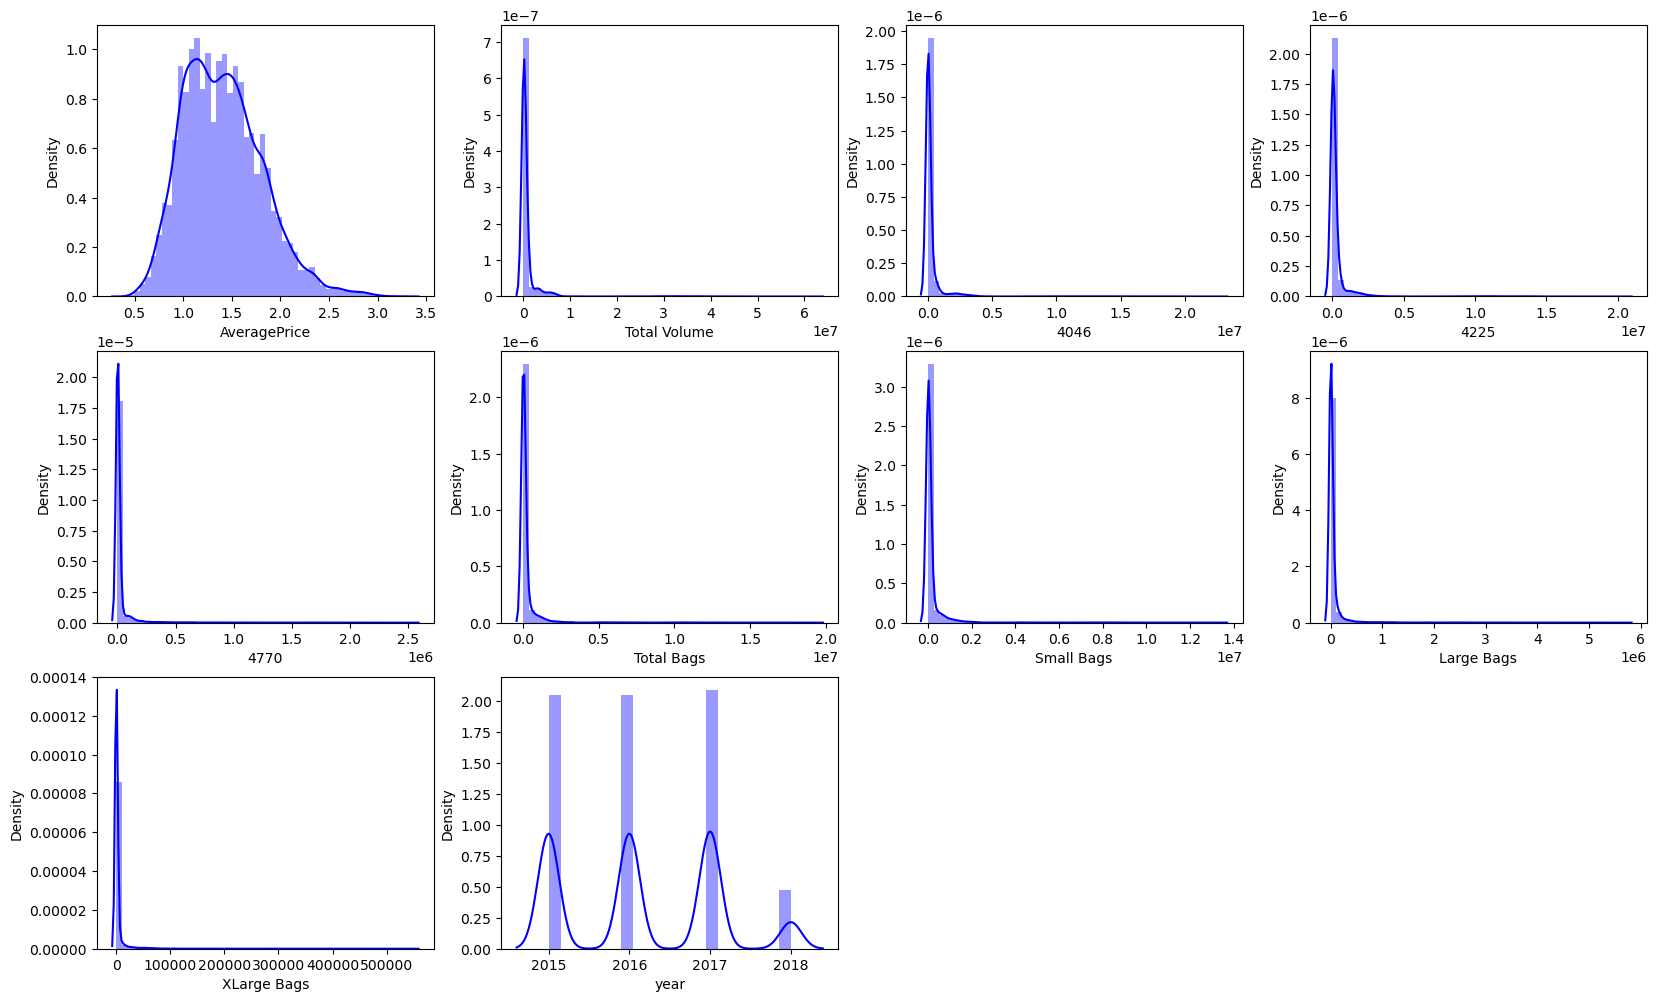

In [15]:
#visualization of data distribution for numerical column
num_col=['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'year']
plt.figure(figsize=(20,12),facecolor='white')
plotnumber=1
for column in num_col:
    if plotnumber <= 10:
        ax=plt.subplot(3,4,plotnumber)
        sns.distplot(df[column],color='b')
        plt.xlabel(column,fontsize=10)
    plotnumber+=1
plt.show()

From above we can see outliers present in the most columns.  
To further investigate we will do the box plot

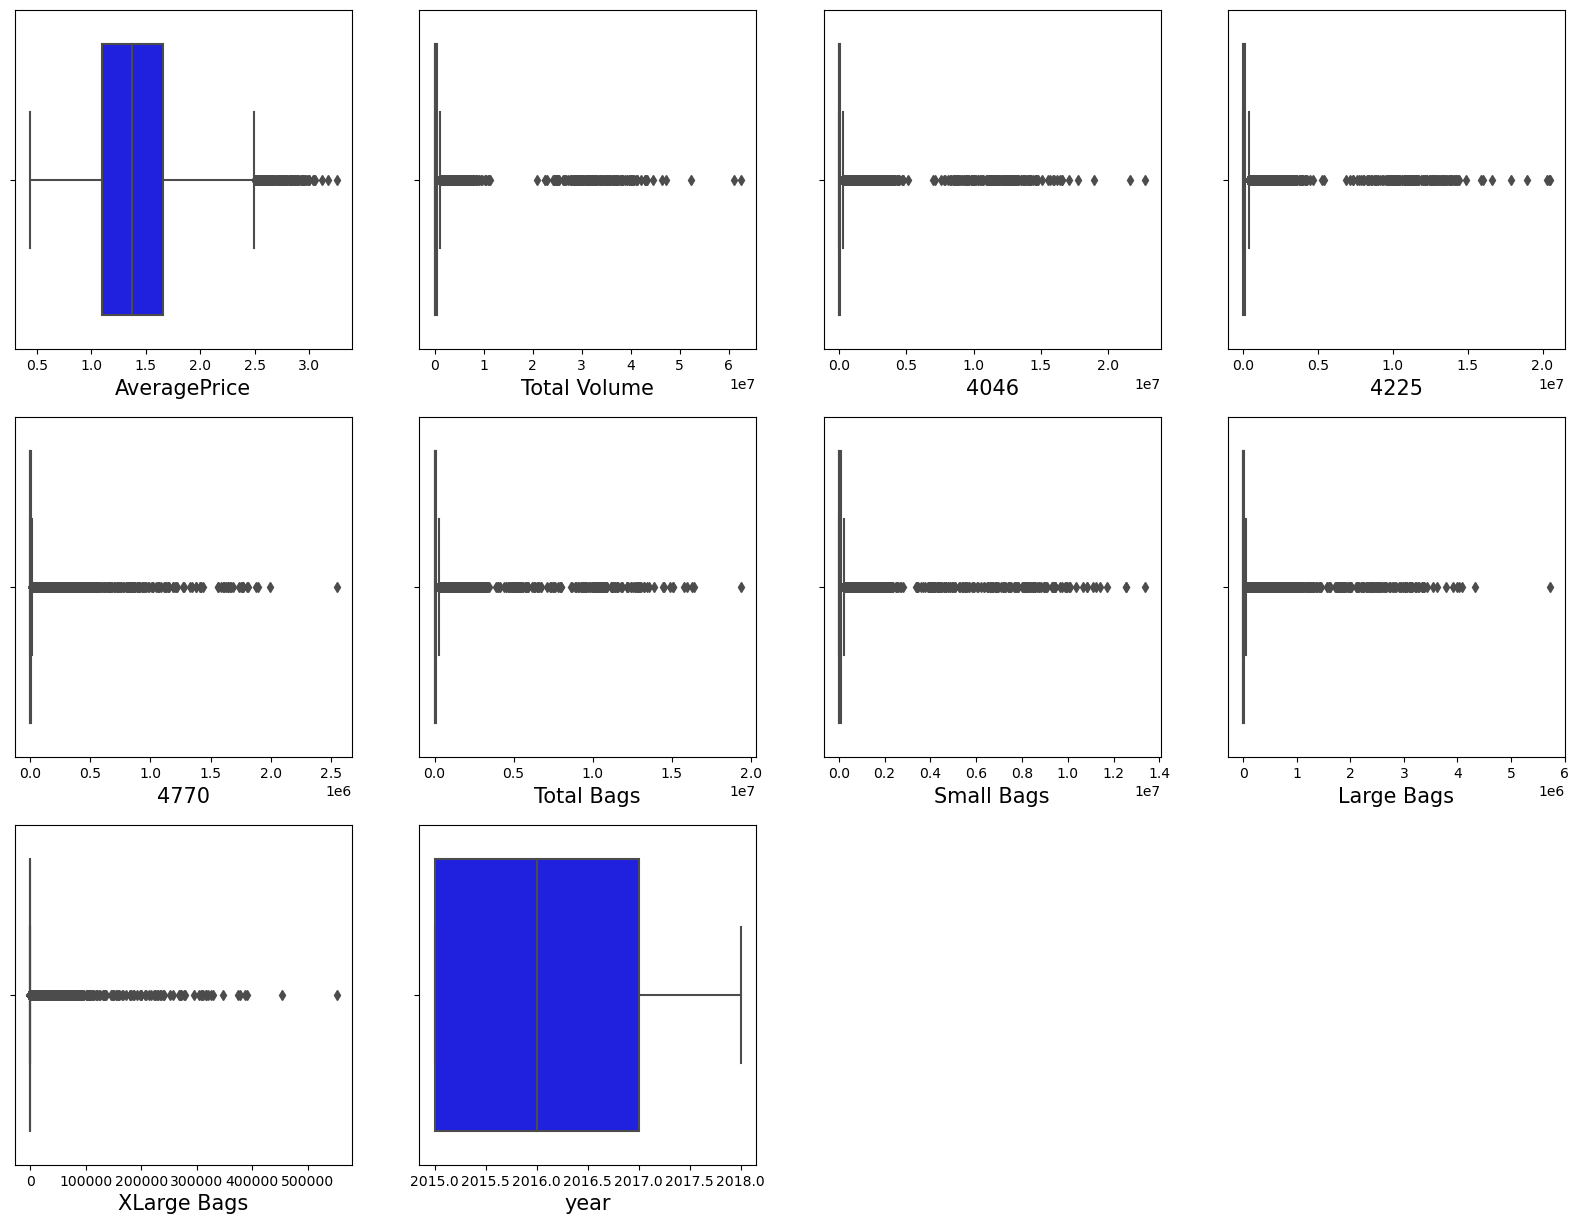

In [16]:
plt.figure(figsize=(20,15),facecolor='white')
graph=1
for column in num_col:
    if graph <= 10:
        ax=plt.subplot(3,4,graph)
        sns.boxplot(df[column],color='b')
        plt.xlabel(column,fontsize=15)
    graph+=1
plt.show()

From above we can see most of the columns have outliers excepet year.  
we will not investigate Average Price column as this is our target/ label.

### Removing outliers using z-score method

In [17]:
from scipy.stats import zscore
z=zscore(df[['Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags']])
abs_z=np.abs(z)
df=df[(abs_z<3).all(axis=1)]  #3-std deviation data
df.shape

(17782, 13)

Before the size was (18249, 13).

## Visualization of categorical Data

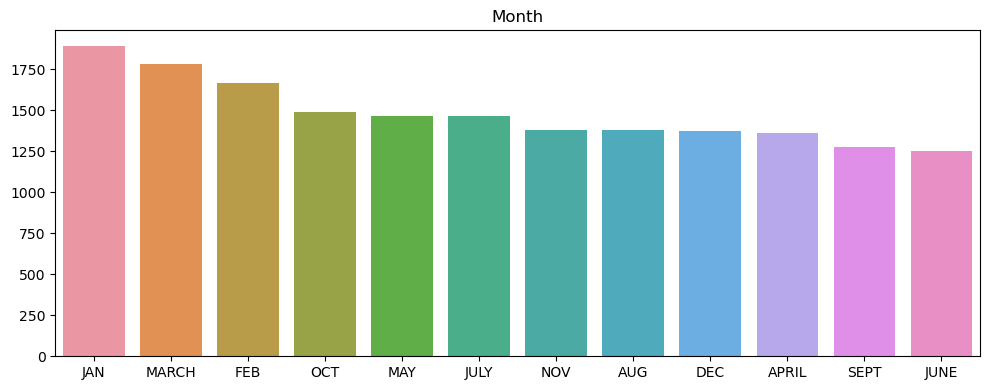

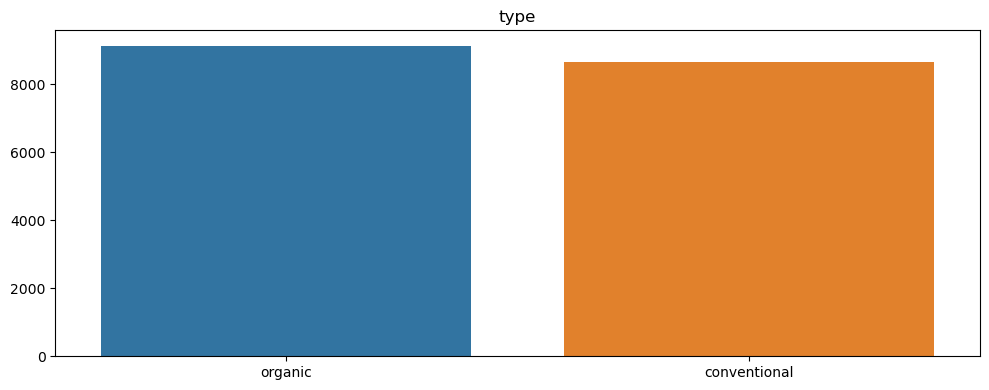

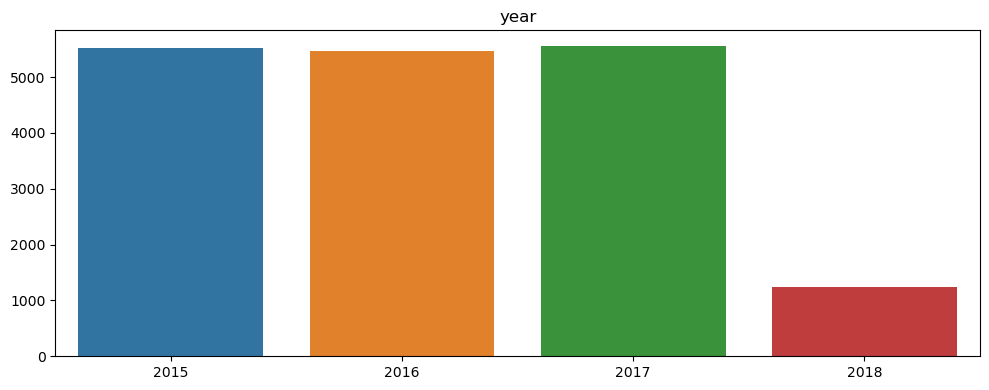

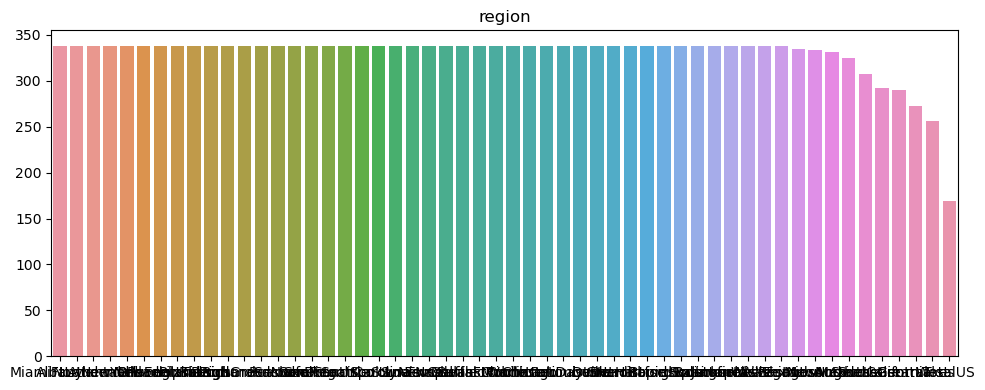

In [18]:
cat_col = ['Month', 'type', 'year', 'region']
for col in cat_col:
    plt.figure(figsize=(10,4))
    sns.barplot(df[col].value_counts().index, df[col].value_counts().values)
    plt.title(col)
    plt.tight_layout()

### Encoding the categorical columns

In [19]:
# Using Label Encoder on target variable
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['region']=le.fit_transform(df['region'])
df['type']=le.fit_transform(df['type'])
df.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,0,DEC
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,0,DEC
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,0,DEC
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015,0,DEC
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015,0,NOV


In [20]:
df['Month']=le.fit_transform(df['Month'])
df.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,0,2
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,0,2
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,0,2
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015,0,2
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015,0,9


### Correlation matrix using HeatMap

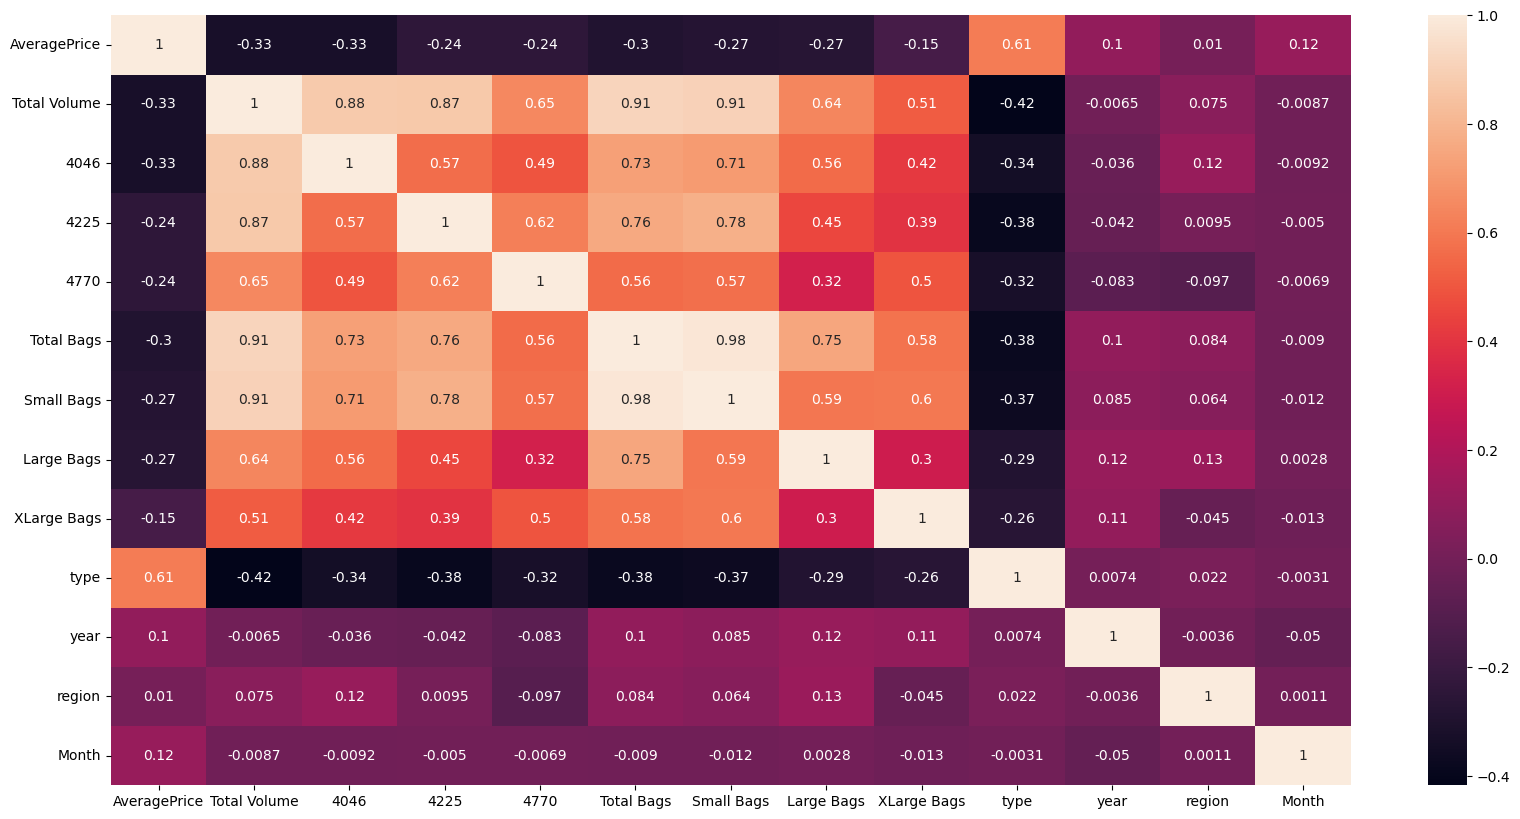

In [21]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), annot = True)
plt.show()

From above correlation matrix, we can see the positive as well as negative correlations between the label and other features.   

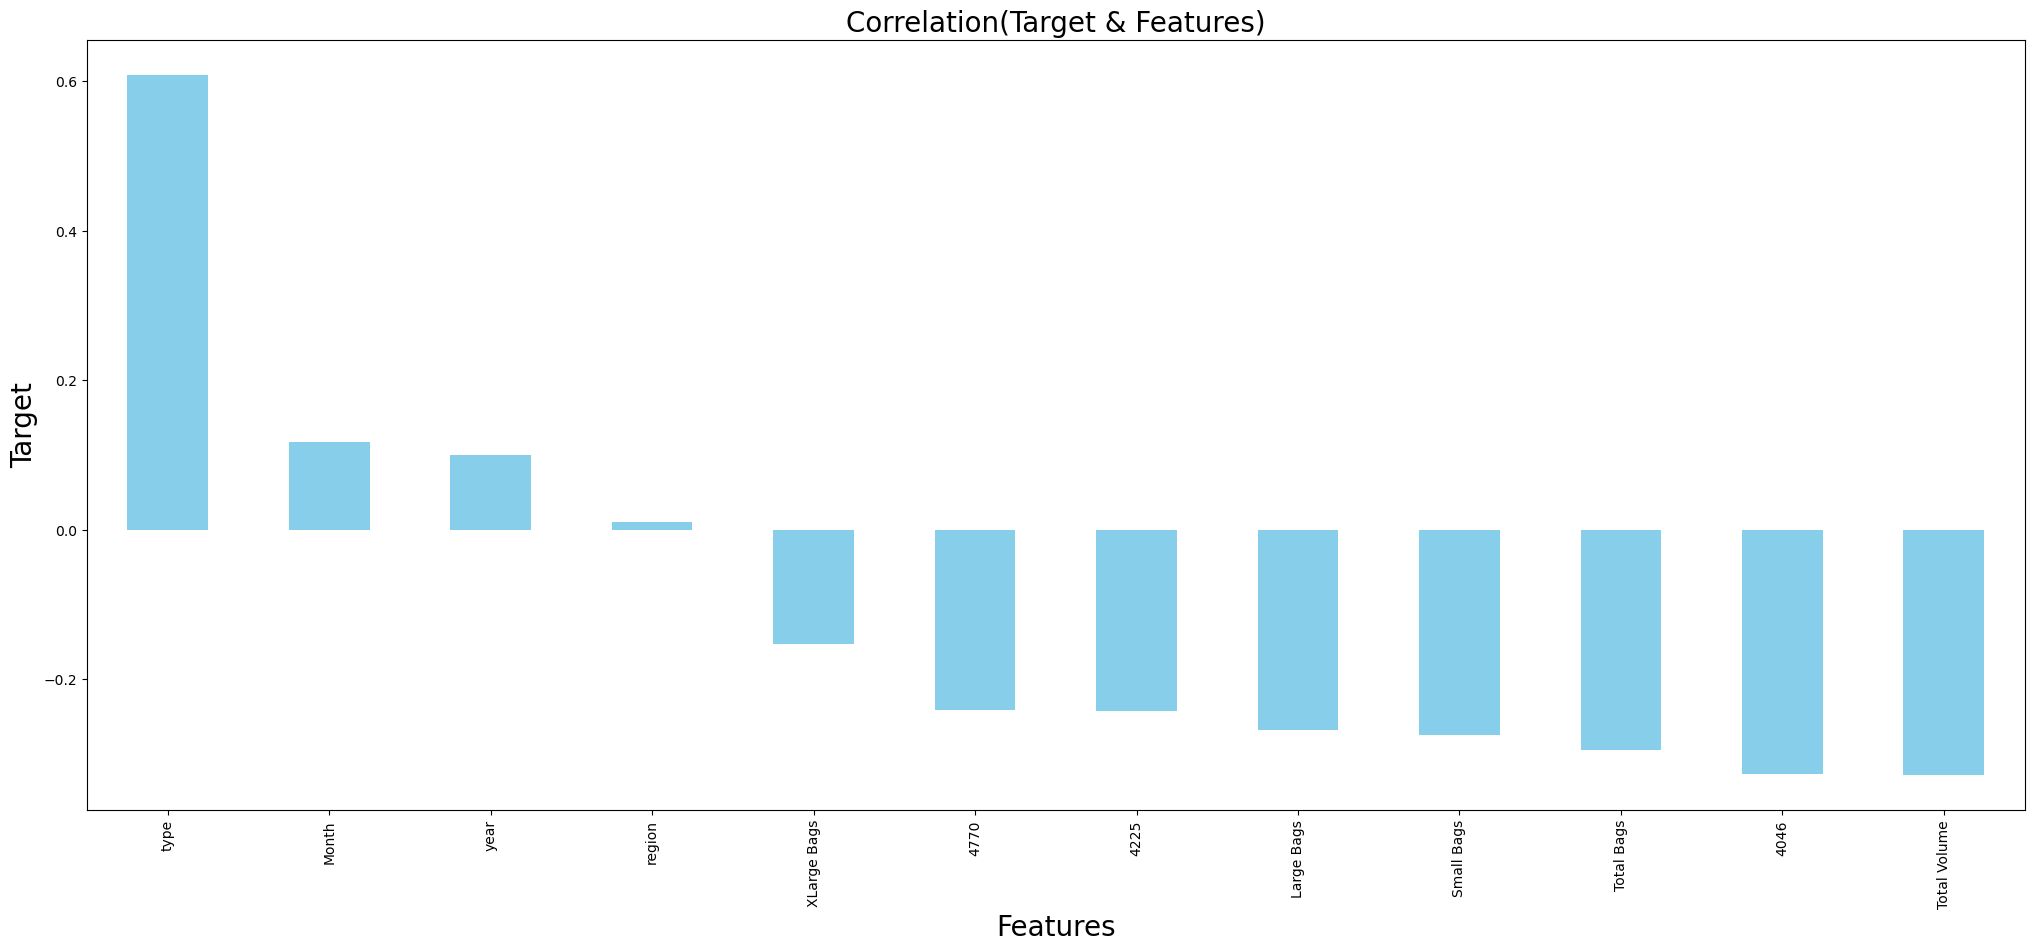

In [22]:
# visualization in plots
plt.figure(figsize =(25, 10))
df.corr()['AveragePrice'].sort_values(ascending = False).drop(['AveragePrice']).plot(kind ='bar', color ='skyblue')
plt.xlabel('Features',fontsize=20)
plt.ylabel('Target',fontsize=20)
plt.title('Correlation(Target & Features)',fontsize=20)
plt.show()

Most of the features are negatively correlated with the target.

### Separating the features and target

In [23]:
x = df.drop(['AveragePrice'],axis=1)  #Features
y = df['AveragePrice']   #Target

### Visualizing the relationship of features with the label/target.

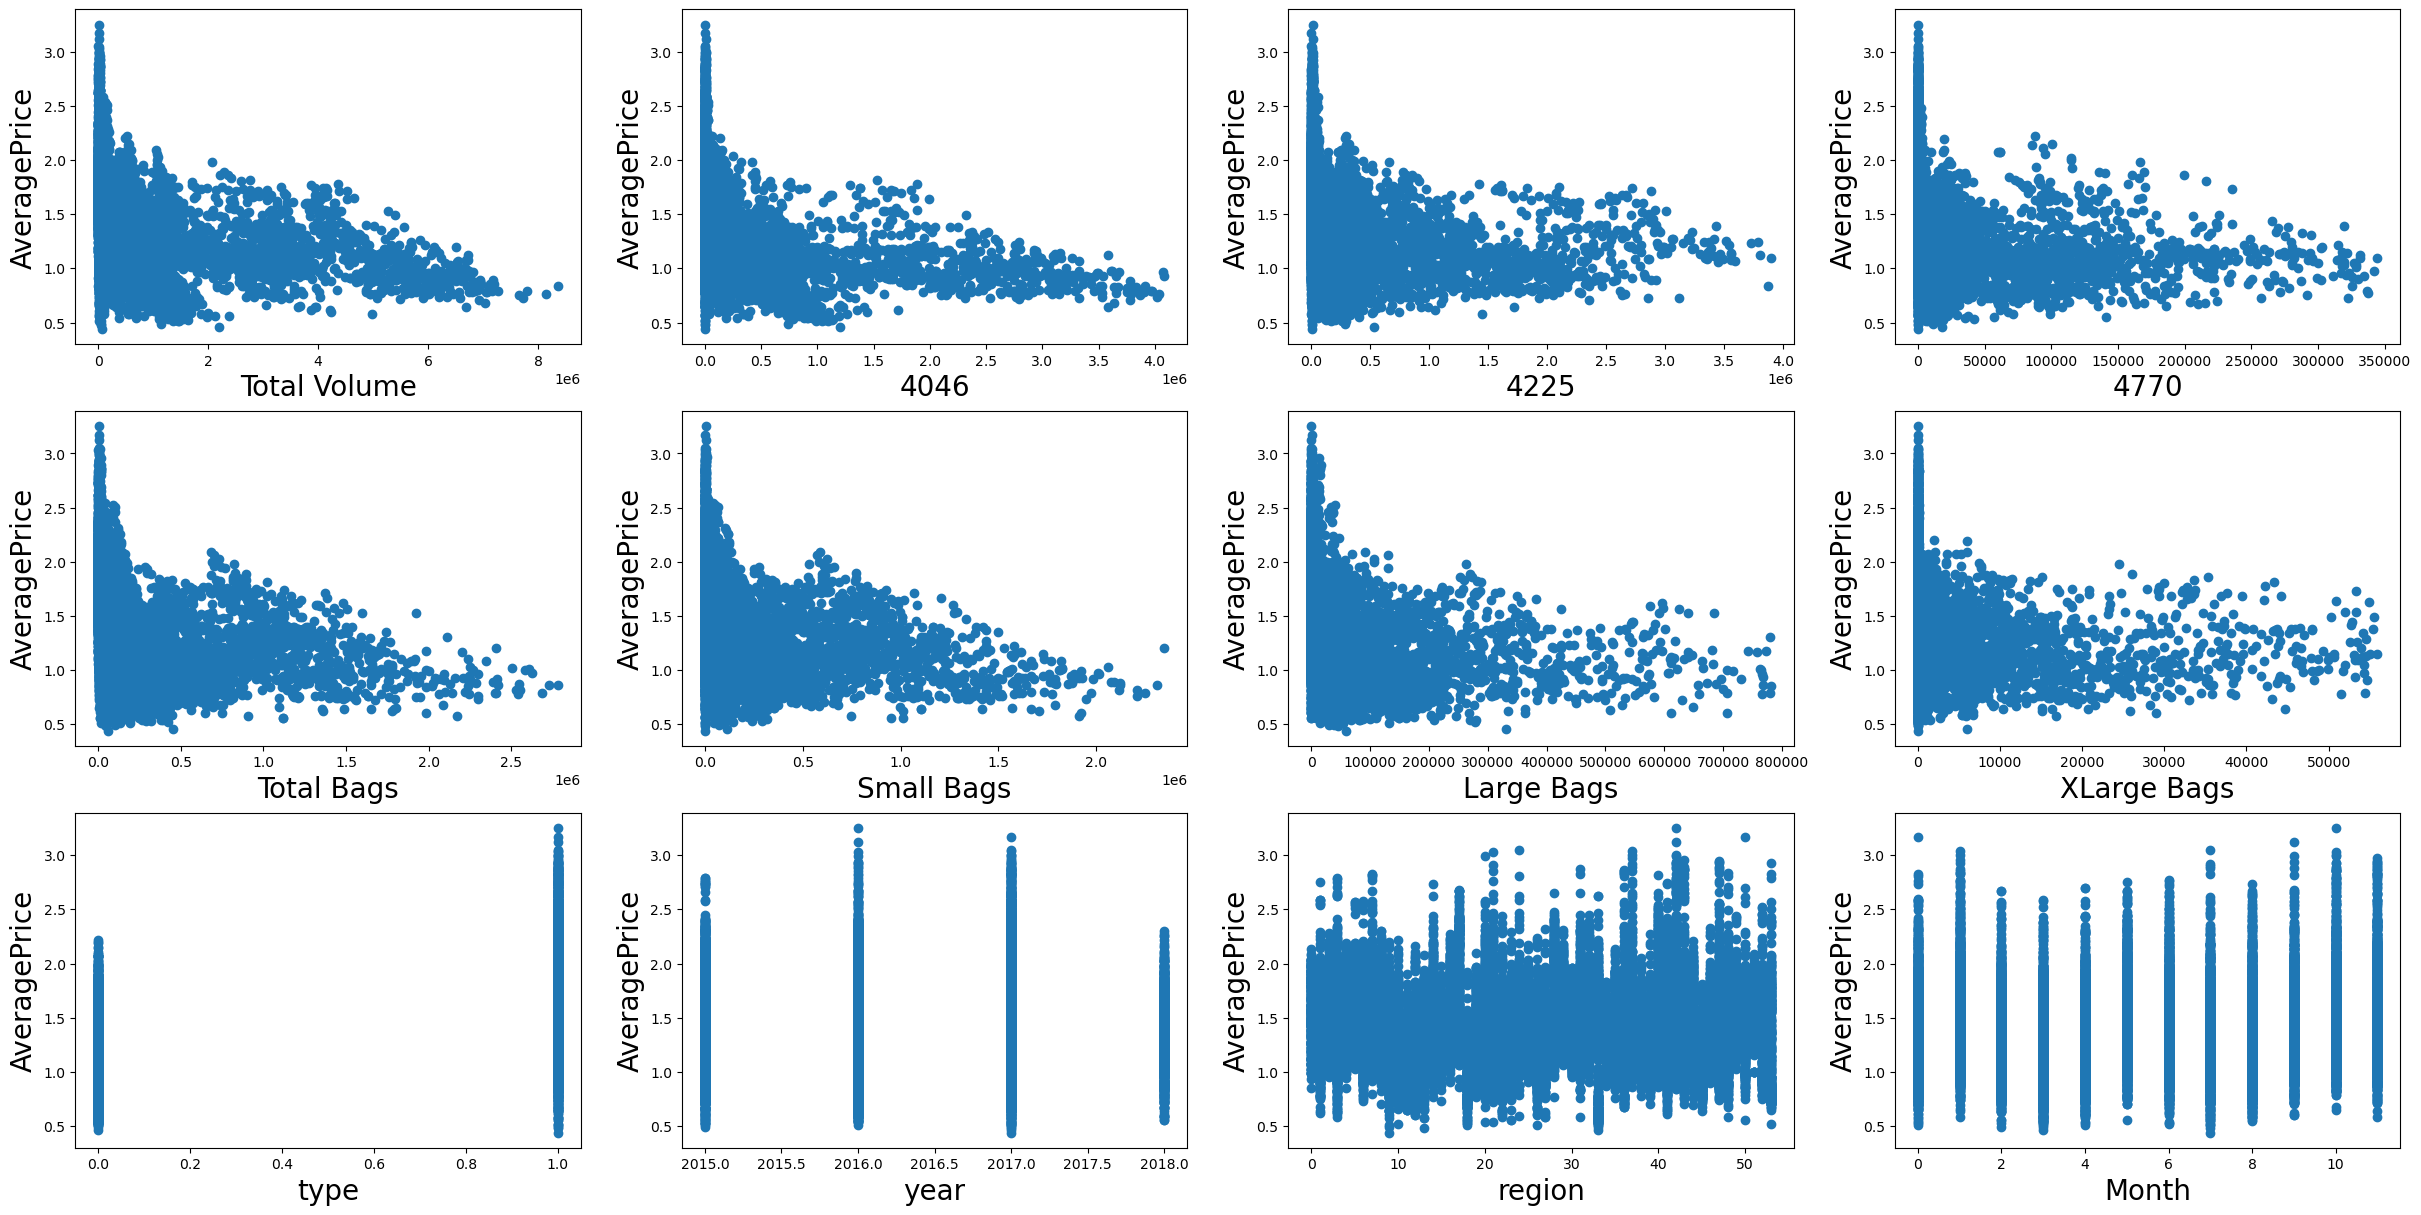

In [24]:
plt.figure(figsize=(30,20), facecolor='white')
plotnumber=1
for column in x:
    if plotnumber <= 12:
        ax=plt.subplot(4,4,plotnumber)
        plt.scatter(x[column],y)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('AveragePrice',fontsize=20)
    plotnumber+=1
plt.show()

### Data Scaling using Standard Scaler

In [25]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x1 = pd.DataFrame(sc.fit_transform(x), columns=x.columns)

In [26]:
x1.head(2)

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month
0,-0.389897,-0.348020,-0.276405,-0.320903,-0.427332,-0.399005,-0.378455,-0.258012,-1.026443,-1.214908,-1.698613,-1.031577
1,-0.399166,-0.348847,-0.301078,-0.320607,-0.424457,-0.395490,-0.378397,-0.258012,-1.026443,-1.214908,-1.698613,-1.031577


### Checking VIF(variance Inflation Factor) for multicolinearity issue

In [27]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["vif_values"]=[variance_inflation_factor(x1.values, i) for i in range(x1.shape[1])]
vif["Features"]=x1.columns
vif

,vif_values,Features
0,4.132594e+08,Total Volume
1,7.781426e+07,4046
2,6.416291e+07,4225
3,4.789466e+05,4770
4,1.928736e+13,Total Bags
5,1.275807e+13,Small Bags
6,1.291910e+12,Large Bags
7,6.649887e+09,XLarge Bags
8,1.233817e+00,type
9,1.093712e+00,year


All are in permissable range. So, no multicolinearity issue.

### Splitting the data into Train and Test Set

In [28]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x1, y, test_size=0.2, random_state=45)

Here using the 80% data for the training set and 20% data for the testing set.

## Model Building(Regression)

In [29]:
#Importing necessary libraries for model building
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.model_selection import cross_val_score, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

### Linear Regression

In [30]:
model1 = LinearRegression()
model1.fit(x_train, y_train)

LinearRegression()

In [31]:
print('R2 Score(Training Accuracy) :'+ str(round(model1.score(x_train, y_train)*100))+'%')
print('R2 score(Testing Accuracy) :'+ str(round(model1.score(x_test, y_test)*100))+'%')
# Model Evaluation
y_pred=model1.predict(x_test)
print('MAE(Mean absolute Error) : %.2f' % mean_absolute_error(y_test, y_pred))
print('MSE(Mean Squared Error) : %.2f' % mean_squared_error(y_test, y_pred))
print('RMSE(Root Mean squared Error) : %.2f' % np.sqrt(mean_absolute_error(y_test, y_pred))) 

R2 Score(Training Accuracy) :42%
R2 score(Testing Accuracy) :44%
MAE(Mean absolute Error) : 0.23
MSE(Mean Squared Error) : 0.09
RMSE(Root Mean squared Error) : 0.48


### Decision Tree Regressor

In [32]:
model2 = DecisionTreeRegressor()
model2.fit(x_train, y_train)

DecisionTreeRegressor()

In [33]:
print('R2 Score(Training Accuracy) :'+ str(round(model2.score(x_train, y_train)*100))+'%')
print('R2 score(Testing Accuracy) :'+ str(round(model2.score(x_test, y_test)*100))+'%')

# Model Evaluation
y_pred=model2.predict(x_test)
print('MAE(Mean absolute Error) : %.2f' % mean_absolute_error(y_test, y_pred))
print('MSE(Mean Squared Error) : %.2f' % mean_squared_error(y_test, y_pred))
print('RMSE(Root Mean squared Error) : %.2f' % np.sqrt(mean_absolute_error(y_test, y_pred))) 

R2 Score(Training Accuracy) :100%
R2 score(Testing Accuracy) :73%
MAE(Mean absolute Error) : 0.13
MSE(Mean Squared Error) : 0.04
RMSE(Root Mean squared Error) : 0.37


### Random Forest Regressor

In [34]:
model3 = RandomForestRegressor()
model3.fit(x_train, y_train)

RandomForestRegressor()

In [35]:
print('R2 Score(Training Accuracy) :'+ str(round(model3.score(x_train, y_train)*100))+'%')
print('R2 score(Testing Accuracy) :'+ str(round(model3.score(x_test, y_test)*100))+'%')

# Model Evaluation
y_pred=model3.predict(x_test)
print('MAE(Mean absolute Error) : %.2f' % mean_absolute_error(y_test, y_pred))
print('MSE(Mean Squared Error) : %.2f' % mean_squared_error(y_test, y_pred))
print('RMSE(Root Mean squared Error) : %.2f' % np.sqrt(mean_absolute_error(y_test, y_pred))) 

R2 Score(Training Accuracy) :98%
R2 score(Testing Accuracy) :88%
MAE(Mean absolute Error) : 0.10
MSE(Mean Squared Error) : 0.02
RMSE(Root Mean squared Error) : 0.31


### GradientBoostingRegressor

In [36]:
model4 = GradientBoostingRegressor()
model4.fit(x_train, y_train)

GradientBoostingRegressor()

In [37]:
print('R2 Score(Training Accuracy) :'+ str(round(model4.score(x_train, y_train)*100))+'%')
print('R2 score(Testing Accuracy) :'+ str(round(model4.score(x_test, y_test)*100))+'%')

# Model Evaluation
y_pred=model4.predict(x_test)
print('MAE(Mean absolute Error) : %.2f' % mean_absolute_error(y_test, y_pred))
print('MSE(Mean Squared Error) : %.2f' % mean_squared_error(y_test, y_pred))
print('RMSE(Root Mean squared Error) : %.2f' % np.sqrt(mean_absolute_error(y_test, y_pred))) 

R2 Score(Training Accuracy) :75%
R2 score(Testing Accuracy) :75%
MAE(Mean absolute Error) : 0.15
MSE(Mean Squared Error) : 0.04
RMSE(Root Mean squared Error) : 0.39


Among all Model in Random Forest Regressor we are getting maximum R2 score and minimum RMSE value. So I am choosing it as our final model.

### Hyper Parameter Tuning

In [41]:
#Random Forest Classifier
from sklearn.model_selection import GridSearchCV 

parameters = {'criterion':['mse','mae'],
             'n_estimators':[20,30],
             'max_depth':[10,20],
             'min_samples_leaf':[5,10],
             'max_features':["auto","sqrt","log2"]
             }

In [42]:
GCV = GridSearchCV(RandomForestRegressor(),parameters,cv=5)

In [ ]:
GCV.fit(x_train,y_train)

#### After so much time,still not be able to get the output.So saving the model without tuning the parameters.

### Saving the model

In [38]:
#saving Random Forest Regressor Model.
import joblib
joblib.dump(model3,"avocado_analysis.pkl")

['avocado_analysis.pkl']